# **Predict the Success of Bank telemarketing**

#  Load Data

In [1]:
#Required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
train_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

 **Key Features in the Dataset:**

* age: Client's age.
* job: Job type.
* marital: Marital status (e.g., married, divorced, single).
* education: Education level.
* default: Indicates if the client has credit in default.
* balance: Average yearly balance in euros.
* housing & loan: Indicators for housing or personal loan status.
* contact: Contact communication type (e.g., cellular, telephone).
* duration: Duration of the last contact in seconds.
* campaign: Number of contacts during the campaign.
* pdays: Days since last contact (or -1 if no prior contact).
* previous: Number of contacts before the current campaign.
* poutcome: Outcome of the previous campaign (e.g., success, failure, unknown).

# Exploratory Data Analysis(EDA)

In [3]:
train_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [5]:
train_df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Check for missing values
print(train_df.isnull().sum())


last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64


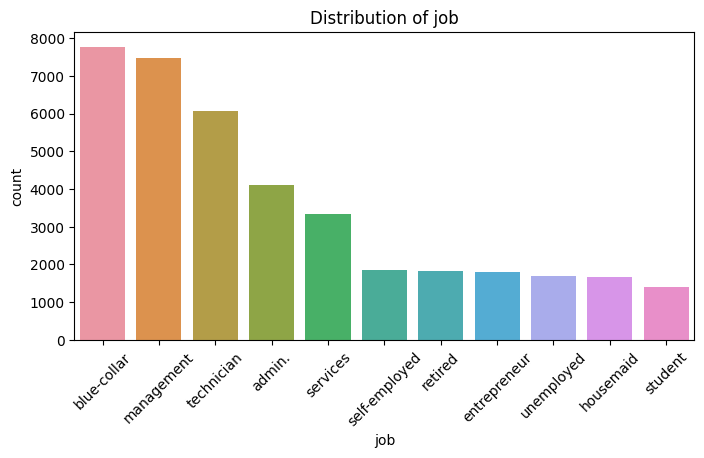

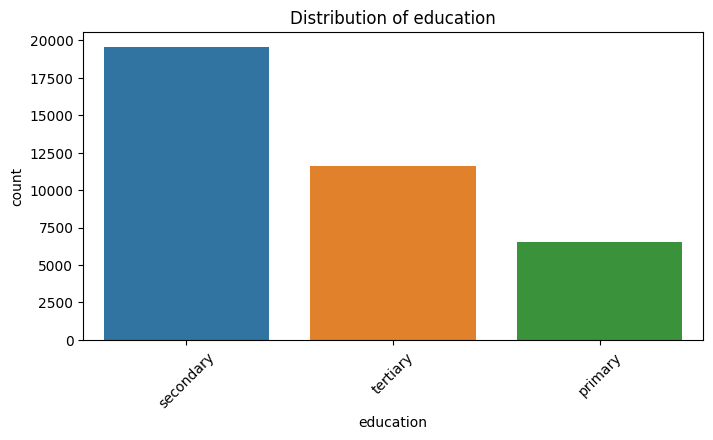

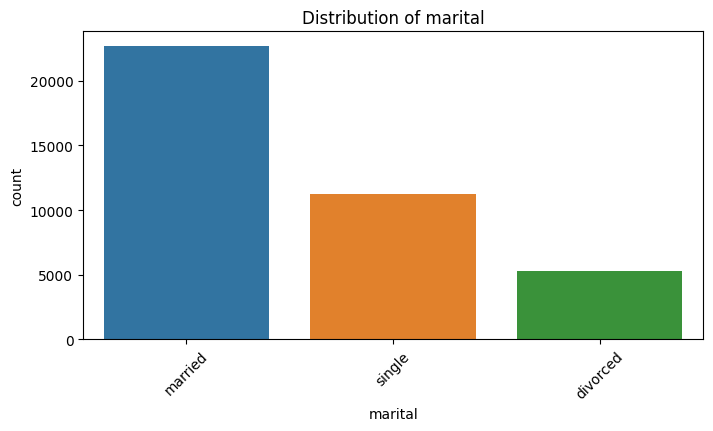

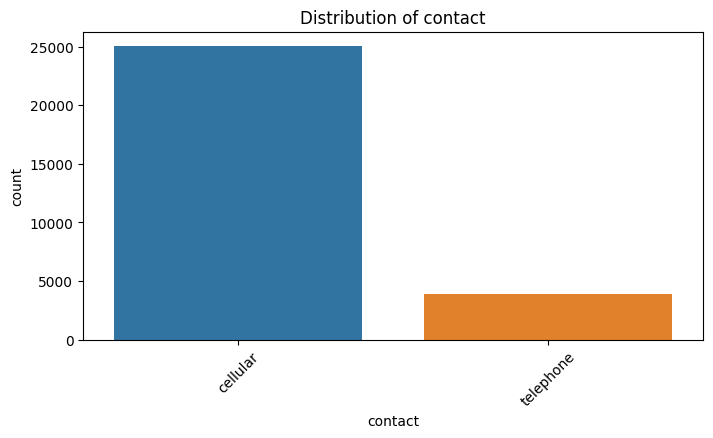

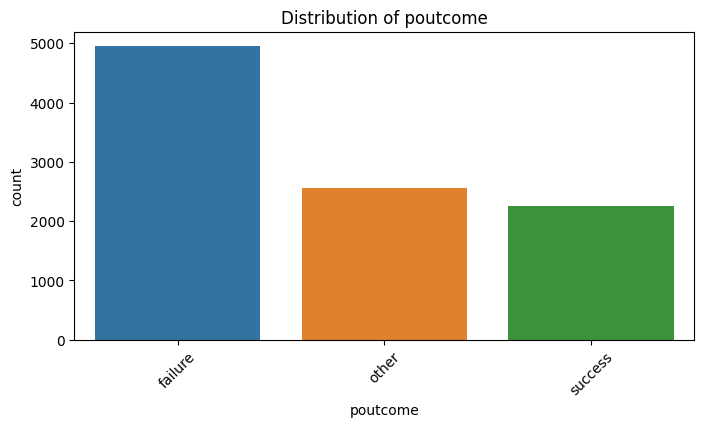

In [7]:
# Visualize categorical columns
categorical_columns = ['job', 'education', 'marital', 'contact', 'poutcome']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


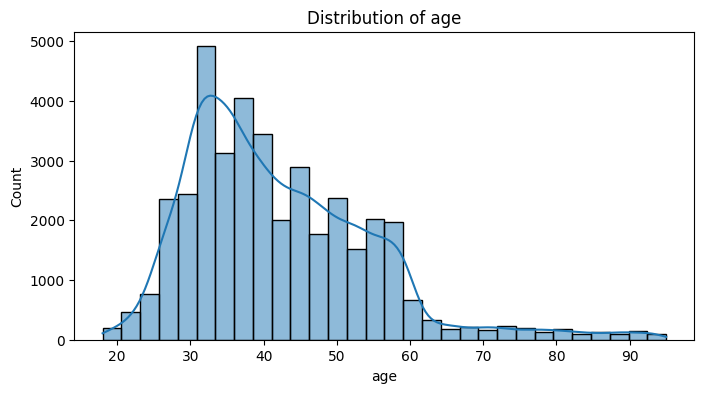

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


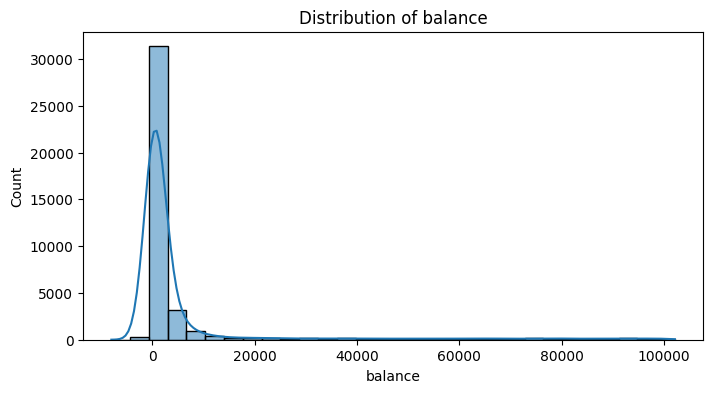

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


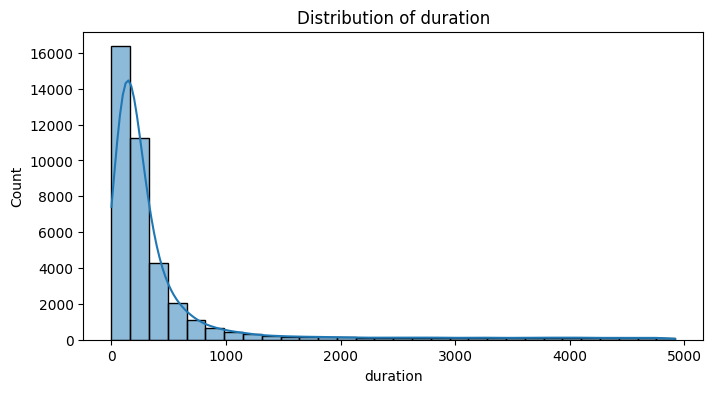

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


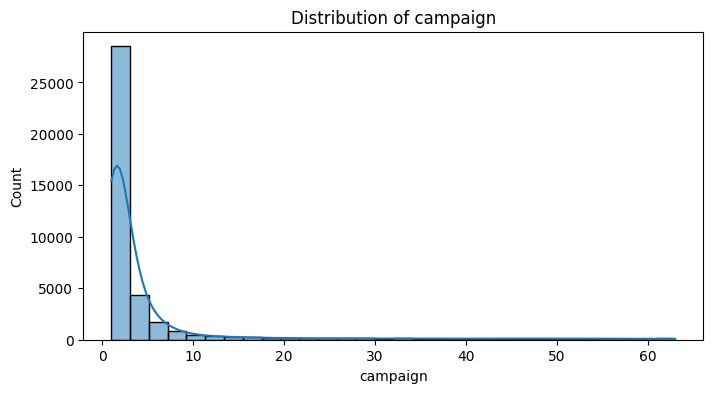

In [8]:
# Histograms for numerical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


* Age: Shows an approximately normal distribution with a peak around the 30-40 age range, but with a slight right skew due to fewer older clients.
* Balance: Right-skewed with most values clustered around lower balances, but with a few higher balances as outliers.
* Duration: Also right-skewed, with many lower values and a few high-duration outliers.
* Campaign: Right-skewed, with most clients contacted a few times but some outliers with very high contact counts.

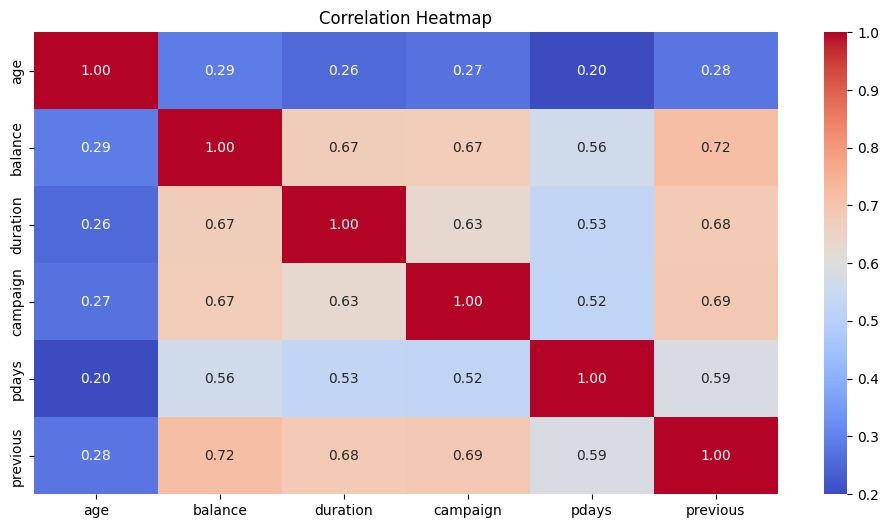

In [9]:
numeric_cols = train_df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


* High correlation (0.72) between balance and previous suggests clients with higher balances have more past contacts.
* Moderately high correlation (0.68) between duration and previous, indicating that clients with more past contacts tend to have longer call durations
* Moderate correlation (0.63) between duration and campaign, implying clients contacted more during the current campaign may engage in longer calls.
* Moderate correlation (0.67) between balance and duration, hinting that clients with higher balances tend to have longer calls.
* Moderate correlation (0.59) between pdays and previous, suggesting that days since the last contact are somewhat related to the number of past contacts.


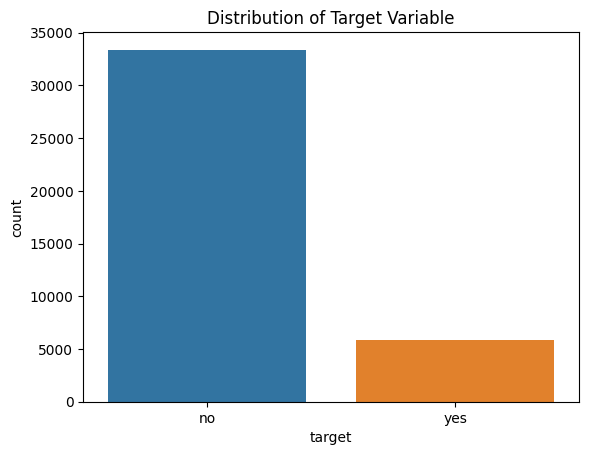

In [10]:
# Visualize target distribution
sns.countplot(x='target', data=train_df)
plt.title("Distribution of Target Variable")
plt.show()

* > The target variable distribution shows a significant class imbalance, with far more "no" than "yes" cases. 
* > This imbalance could lead to model bias toward predicting "no" and may require techniques like resampling

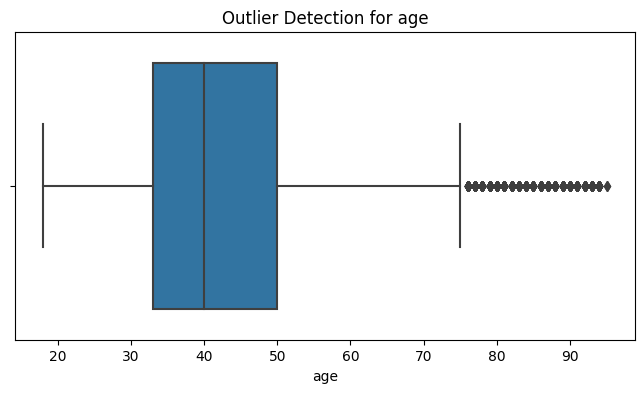

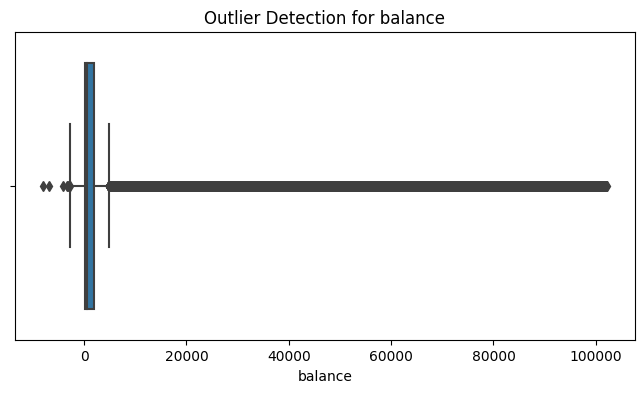

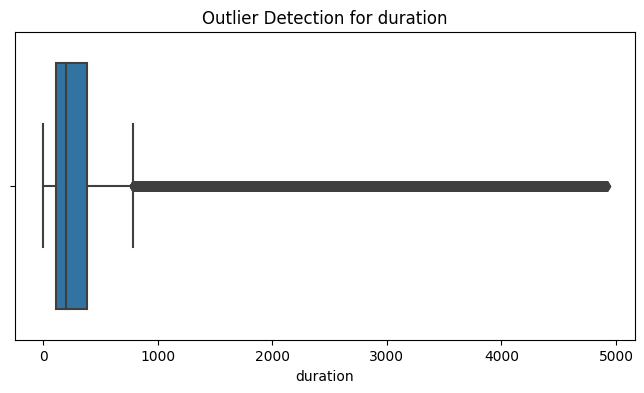

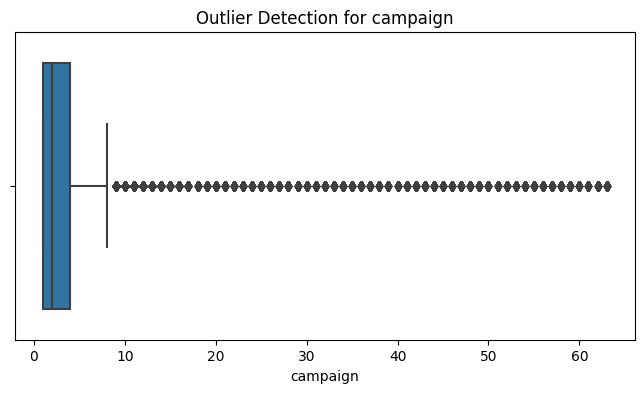

In [11]:
# Boxplot to identify potential outliers 
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()


* Each variable shows significant outliers. "Age" has a few high outliers, while "balance," "duration," and "campaign" have numerous extreme values. These outliers could affect model performance, leading to bias or skewed results
 
* For analysis or models sensitive to outliers, consider removing values beyond a certain range (e.g. 1.5 times the IQR)

In [12]:
train_df.nunique()

last contact date    1013
age                    78
job                    11
marital                 3
education               3
default                 2
balance              9535
housing                 2
loan                    2
contact                 2
duration             3146
campaign               63
pdays                 865
previous              276
poutcome                3
target                  2
dtype: int64

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


test data also has some null values

# Preprocessing 


In [16]:
# Required Libraries
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Function to preprocess both train and test datasets
def preprocess_data(df, is_train=True):
    # Convert 'last contact date' to datetime, if it exists
    if 'last contact date' in df.columns:
        df['last contact date'] = pd.to_datetime(df['last contact date'], errors='coerce')
        
        # Extract 'last contact month' from the 'last contact date'
        df['last_contact_month'] = df['last contact date'].dt.month_name()
        
        # Extract 'last contact week' from the 'last contact date'
        df['last_contact_week'] = df['last contact date'].dt.isocalendar().week
       
    else:
        # Add the 'last_contact_month' and 'last_contact_week' as 'unknown' or a default value for test data
        df['last_contact_month'] = 'unknown'  # Or another default month
        df['last_contact_week'] = 0  # Or another default week
        
    # Create 'days_since_contact' column from 'pdays' (replace -1 with NaN)
    df['days_since_contact'] = df['pdays'].replace(-1, np.nan)

    # Define categorical and numerical columns
    cat_cols = ['job', 'education', 'poutcome', 'marital', 'last_contact_month', 'contact']  
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Ensure 'last_contact_week' is only added once
    if 'last_contact_week' not in num_cols:
        num_cols.append('last_contact_week')

    # Create a pipeline for numerical preprocessing 
    numerical_pipeline = Pipeline(steps=[ 
        ('imputer', SimpleImputer(strategy='median')),  # Median imputation for numerical columns
    ])
    
    # Create a pipeline for categorical preprocessing 
    categorical_pipeline = Pipeline(steps=[ 
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),  # Impute missing categorical values
        ('onehot', OneHotEncoder(drop='first', sparse=False))  # One-hot encode categorical columns
    ])

    # Apply pipelines to both numerical and categorical columns
    preprocessor = ColumnTransformer(transformers=[ 
        ('num', numerical_pipeline, num_cols), 
        ('cat', categorical_pipeline, cat_cols) 
    ], remainder='passthrough')  # Keep other columns without transformation
    
    # Transform the data using the preprocessor pipeline
    transformed_array = preprocessor.fit_transform(df)

    # Get names of transformed columns
    num_transformed_cols = num_cols
    onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
    num_transformed_cols += list(onehot_feature_names)

    # Get the remaining columns (like 'pdays' and 'target')
    remaining_cols = [col for col in df.columns if col not in cat_cols + num_cols]
    
    final_columns = num_transformed_cols + remaining_cols
    transformed_df = pd.DataFrame(transformed_array, columns=final_columns)
    
    # Convert binary columns to integer (0 and 1)
    binary_columns = ['default', 'housing', 'loan']
    if is_train:
        binary_columns.append('target')  # Add 'target' only for training data
    
    le = LabelEncoder()
    for col in binary_columns:
        transformed_df[col] = le.fit_transform(df[col]).astype(int)  # Convert to integer 0 and 1

    # Convert `was_previously_contacted` to integer 0 and 1
    transformed_df['was_previously_contacted'] = np.where(df['pdays'] == -1, 0, 1).astype(int)
    
    # Handle outliers more robustly in numerical columns ('age', 'balance', 'duration', 'campaign')
    for col in ['age', 'balance', 'duration', 'campaign']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        transformed_df[col] = transformed_df[col].clip(lower_limit, upper_limit)

    # Drop columns that won't be used for prediction ('last contact date', 'pdays')
    cols_to_drop = ['last contact date', 'pdays']
    transformed_df.drop(columns=[col for col in cols_to_drop if col in transformed_df.columns], inplace=True)

    # Ensure categorical one-hot columns are boolean
    transformed_df[onehot_feature_names] = transformed_df[onehot_feature_names].astype(bool)

    # Convert numerical columns to numeric types (handle invalid entries)
    numeric_columns = ['age', 'balance', 'duration', 'campaign', 'previous']
    for col in numeric_columns:
        transformed_df[col] = pd.to_numeric(transformed_df[col], errors='coerce')

    # Scale the numerical columns after conversion to numeric types
    scaler = StandardScaler()
    transformed_df[numeric_columns] = scaler.fit_transform(transformed_df[numeric_columns])

    # Handle imbalanced target distribution (if training data)
    if is_train:
        df_majority = transformed_df[transformed_df.target == 0]
        df_minority = transformed_df[transformed_df.target == 1]
        
        # Upsample minority class
        df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
        transformed_df = pd.concat([df_majority, df_minority_upsampled])
        
        # Shuffle the data
        transformed_df = transformed_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return transformed_df


In [17]:
# Apply preprocessing on both train and test data
train_df = preprocess_data(train_df, is_train=True)
test_df = preprocess_data(test_df, is_train=False)

# Display the cleaned and transformed datasets info
train_df.info()
test_df.info()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66768 entries, 0 to 66767
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           66768 non-null  float64
 1   balance                       66768 non-null  float64
 2   duration                      66768 non-null  float64
 3   campaign                      66768 non-null  float64
 4   previous                      66768 non-null  float64
 5   last_contact_week             66768 non-null  object 
 6   days_since_contact            66768 non-null  object 
 7   job_blue-collar               66768 non-null  bool   
 8   job_entrepreneur              66768 non-null  bool   
 9   job_housemaid                 66768 non-null  bool   
 10  job_management                66768 non-null  bool   
 11  job_retired                   66768 non-null  bool   
 12  job_self-employed             66768 non-null  bool   
 13  j

In [18]:
train_df['last_contact_week'] = pd.to_numeric(train_df['last_contact_week'], errors='coerce').astype(float)
train_df['days_since_contact'] = pd.to_numeric(train_df['days_since_contact'], errors='coerce').astype(float)

test_df['last_contact_week'] = pd.to_numeric(test_df['last_contact_week'], errors='coerce').astype(float)
test_df['days_since_contact'] = pd.to_numeric(test_df['days_since_contact'], errors='coerce').astype(float)

In [19]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66768 entries, 0 to 66767
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           66768 non-null  float64
 1   balance                       66768 non-null  float64
 2   duration                      66768 non-null  float64
 3   campaign                      66768 non-null  float64
 4   previous                      66768 non-null  float64
 5   last_contact_week             66768 non-null  float64
 6   days_since_contact            66768 non-null  float64
 7   job_blue-collar               66768 non-null  bool   
 8   job_entrepreneur              66768 non-null  bool   
 9   job_housemaid                 66768 non-null  bool   
 10  job_management                66768 non-null  bool   
 11  job_retired                   66768 non-null  bool   
 12  job_self-employed             66768 non-null  bool   
 13  j

# Model

# Dummy - baseline

In [20]:
# df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# from sklearn.dummy import DummyClassifier
# model = DummyClassifier().fit(X, y)

# X_test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
# y_pred = model.predict(X_test)

# submission = pd.DataFrame({'id': range(0, X_test.shape[0]),
#                            'target': y_pred})

# submission.to_csv('submission.csv', index=False)

**Test Data F1 score - 0.46**

# Logistic regression

In [21]:
# # Required libraries
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score

# #  Separate features and target
# X = train_df.drop(columns=['target'])
# y = train_df['target']

# #  Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# #  Train a Logistic Regression model with optional hyperparameter tuning
# logreg = LogisticRegression(max_iter=1000, C=1.0)  # Adjust C as needed for regularization tuning
# logreg.fit(X_train, y_train)

# #  Make predictions on the validation set
# y_val_pred = logreg.predict(X_val)

# #  Evaluate using F1 score (macro)
# f1 = f1_score(y_val, y_val_pred, average='macro')
# print(f"F1 Score (macro): {f1}")

# #  Predict on the test set for submission
# test_predictions = logreg.predict(test_df)

# # Create predictions as "yes" and "no" instead of 0 and 1
# test_predictions_str = ["yes" if pred == 1 else "no" for pred in test_predictions]

# # Create submission DataFrame
# submission = pd.DataFrame({'id': range(0, test_df.shape[0]), 'target': test_predictions_str})

# # Save to CSV
# submission.to_csv('submission.csv', index=False)

# # Check the submission file
# submission_check = pd.read_csv('submission.csv')
# print(submission_check.head())
# print(submission_check.info())


**F1 Score (macro): 0.8276168066877051**



# SGD CLASSIFIER

In [22]:
# # Required Libraries
# import pandas as pd
# import warnings
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import f1_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.exceptions import ConvergenceWarning


# #  Define features and target variable
# X = train_df.drop(columns=['target'])  # Features
# y = train_df['target']                 # Target variable

# # Split the data into training and vahjlidation sets for evaluation
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# #  Define a pipeline with scaling and SGD Classifier
# # Scaling helps in ensuring convergence during SGD optimization
# sgd_pipeline = Pipeline([
#     ('scaler', StandardScaler()),            # Standardize features
#     ('classifier', SGDClassifier(random_state=42))
# ])

# #  Define hyperparameter grid for SGDClassifier
# # Use loss functions suited for classification and regularization parameters
# sgd_param_grid = {
#     'classifier__loss': ['log_loss', 'hinge'],           # Log_loss for logistic regression, hinge for SVM
#     'classifier__penalty': ['l2', 'l1', 'elasticnet'],  # Regularization techniques
#     'classifier__alpha': [1e-4, 1e-3, 1e-2],        # Regularization strength
#     'classifier__max_iter': [1000, 1500, 2000],     # Ensuring enough iterations for convergence
#     'classifier__tol': [1e-3, 1e-4]                 # Tolerance for stopping criteria
# }

# #  Grid search with cross-validation for SGD
# grid_search_sgd = GridSearchCV(
#     sgd_pipeline, sgd_param_grid, cv=5, scoring='f1_macro', 
#     n_jobs=-1, verbose=1  # Set to -1 to utilize all processors
# )
# grid_search_sgd.fit(X_train, y_train)  # Fit the model on the training data

# #  Evaluate the best SGD model on validation set
# best_sgd = grid_search_sgd.best_estimator_
# y_val_pred_sgd = best_sgd.predict(X_val)  # Predict on the validation set
# f1_sgd = f1_score(y_val, y_val_pred_sgd, average='macro')

# print(f"Optimized SGD F1 Score (macro) on Validation Set: {f1_sgd}")
# print(f"Best parameters after tuning: {grid_search_sgd.best_params_}")

# #  Predict on the test set for submission
# # Ensure test_df is preprocessed similarly as train_df
# test_predictions = best_sgd.predict(test_df)

# # Save test predictions for submission
# submission = pd.DataFrame({'id': range(0, test_df.shape[0]), 'target': test_predictions})
# submission['target'] = submission['target'].map({0: "no", 1: "yes"})
# submission.to_csv('submission.csv', index=False)

# # Optional: Check the first few rows of the submission file
# print(submission.head())


**Optimized SGD F1 Score (macro) on Validation Set: 0.8098514148489355**




Feature Importances:
                         Feature  Importance
2                       duration    0.331960
5              last_contact_week    0.078068
1                        balance    0.070492
0                            age    0.070222
4                       previous    0.042975
6             days_since_contact    0.040974
18              poutcome_success    0.034695
19              poutcome_unknown    0.032694
33               contact_unknown    0.032496
3                       campaign    0.031940
37      was_previously_contacted    0.030360
35                       housing    0.026148
28        last_contact_month_May    0.012943
27      last_contact_month_March    0.012821
30    last_contact_month_October    0.011634
20               marital_married    0.009564
7                job_blue-collar    0.009000
16            education_tertiary    0.008952
15           education_secondary    0.008831
36                          loan    0.008485
21                marital_single    0.007981
26       last_contact_month_June    0.007686
29   last_contact_month_November    0.007610
9                 job_management    0.006574
22     last_contact_month_August    0.006230
13                job_technician    0.006198
32             contact_telephone    0.006152
25       last_contact_month_July    0.006139
31  last_contact_month_September    0.005848
12                   job_student    0.004972
23   last_contact_month_February    0.004305
34                       default    0.004012
24    last_contact_month_January    0.003883
11                  job_services    0.003652
14                job_unemployed    0.003603
17                poutcome_other    0.003365
8               job_entrepreneur    0.003301
10             job_self-employed    0.003235
add Codeadd Markdown            education_unknown    0.002692

# Random forest

In [23]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

# Define features and target variable
X = train_df.drop(columns=['target'])  # Features
y = train_df['target']  # Target variable

# Split the data into training and validation sets for evaluation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define a pipeline with RFE and Random Forest
rf_pipeline = Pipeline([
    ('feature_selection', RFE(estimator=RandomForestClassifier(random_state=42), step=0.1)),  # RFE with step
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Define hyperparameter grid for GridSearchCV
rf_param_grid = {
    'feature_selection__n_features_to_select': [38, 40],  # Number of features to keep after RFE
    'classifier__n_estimators': [200, 300],  # Number of trees (estimators)
    'classifier__max_depth': [None],  # Maximum depth of trees
    'classifier__min_samples_split': [5, 10],  # Minimum samples to split an internal node
    'classifier__min_samples_leaf': [2, 5],  # Minimum samples at a leaf node
    'classifier__max_features': ['sqrt','log2'],  # Feature selection method for splits
    'classifier__bootstrap': [True],  
    'classifier__oob_score': [False] 
}

# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV with StratifiedKFold
grid_search_rf = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=stratified_kfold,  # Stratified K-fold cross-validation
    scoring='f1_macro',  # Use F1 Macro as the scoring metric
    n_jobs=-1,  # Use all available CPU cores
    verbose=3
)

# Fit the model with the grid search
grid_search_rf.fit(X_train, y_train)

# Evaluate the best Random Forest model with RFE
best_rf = grid_search_rf.best_estimator_
y_val_pred_rf = best_rf.predict(X_val)  # Predict on the validation set
f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')

print(f"Best Random Forest F1 Score (macro) on Validation Set: {f1_rf}")
print(f"Best parameters: {grid_search_rf.best_params_}")

# Predict on the test set for submission
test_predictions = best_rf.predict(test_df)  # Ensure test_df is preprocessed

# # Save test predictions for submission
# submission = pd.DataFrame({'id': range(0, test_df.shape[0]),
#                            'target': test_predictions})
# submission['target'] = submission['target'].map({0: "no", 1: "yes"})
# submission.to_csv('submission.csv', index=False)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 4/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__oob_score=False, feature_selection__n_features_to_select=38;, score=0.925 total time=  52.3s
[CV 3/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__oob_score=False, feature_selection__n_features_to_select=38;, score=0.930 total time=  52.4s
[CV 1/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__oob_score=False, feature_selection__n_features_to_select=38;, score=0.928 total time=  53.0s
[CV 2/10] END classifier__bootstra

Best Random Forest F1 Score (macro) on Validation Set: 0.9322932249157946
Best parameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300, 'classifier__oob_score': False, 'feature_selection__n_features_to_select': 38}

In [24]:
# # Access the Random Forest classifier from the pipeline
# rf_model = best_rf.named_steps['classifier']

# # Get the feature importances from the classifier
# feature_importances = rf_model.feature_importances_

# # Get the names of the selected features from RFE
# selected_features = X_train.columns[best_rf.named_steps['feature_selection'].support_]

# # Create a DataFrame for better visualization
# importance_df = pd.DataFrame({
#     'Feature': selected_features,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# # Print the feature importances
# print("Feature Importances:")
# print(importance_df)

# # Optionally save to a CSV file
# importance_df.to_csv('feature_importances.csv', index=False)


Feature Importances:
                         Feature  Importance
2                       duration    0.331960
5              last_contact_week    0.078068
1                        balance    0.070492
0                            age    0.070222
4                       previous    0.042975
6             days_since_contact    0.040974
18              poutcome_success    0.034695
19              poutcome_unknown    0.032694
33               contact_unknown    0.032496
3                       campaign    0.031940
37      was_previously_contacted    0.030360
35                       housing    0.026148
28        last_contact_month_May    0.012943
27      last_contact_month_March    0.012821
30    last_contact_month_October    0.011634
20               marital_married    0.009564
7                job_blue-collar    0.009000
16            education_tertiary    0.008952
15           education_secondary    0.008831
36                          loan    0.008485
21                marital_single  

In [29]:
columns_to_drop = ['last_contact_month_January',
    'job_services', 
    'job_unemployed', 
    'poutcome_other', 
    'job_entrepreneur', 
    'job_self-employed'
]

X_train_dropped = X_train.drop(columns=columns_to_drop, errors='ignore')
X_val_dropped = X_val.drop(columns=columns_to_drop, errors='ignore')

# Refit the best estimator on dropped columns
best_rf.fit(X_train_dropped, y_train)

# Predict and evaluate
y_val_pred_rf = best_rf.predict(X_val_dropped)
f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')

print(f"F1 Score after dropping columns: {f1_rf}")
print(f"Best parameters: {grid_search_rf.best_params_}")

# Predict on the test set for submission
test_df_dropped = test_df.drop(columns=columns_to_drop, errors='ignore')
test_predictions = best_rf.predict(test_df_dropped)

# Save test predictions for submission
submission = pd.DataFrame({
    'id': range(0, test_df.shape[0]),
    'target': test_predictions
})
submission['target'] = submission['target'].map({0: "no", 1: "yes"})
submission.to_csv('submission.csv', index=False)

F1 Score after dropping columns: 0.9332066918402431
Best parameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300, 'classifier__oob_score': False, 'feature_selection__n_features_to_select': 38}


In [30]:
# import warnings
# import pandas as pd
# from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# from sklearn.metrics import f1_score
# import numpy as npg


# # Define features and target variable
# X = train_df.drop(columns=['target'])  # Features
# y = train_df['target']                 # Target variable

# # Split the data into training and validation sets for evaluation
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Define a pipeline with RFE and Random Forest
# rf_pipeline = Pipeline([
#     ('feature_selection', RFE(estimator=RandomForestClassifier(random_state=42), step=0.1)),  # RFE with step
#     ('classifier', RandomForestClassifier(random_state=42, oob_score=True))  # Enable OOB scoring
# ])


# # Define hyperparameter space for RandomizedSearchCV
# rf_param_dist = {
#     'feature_selection__n_features_to_select': [36, 38, 40],  # Add more options for feature selection
#     'classifier__n_estimators': [200, 300],  # Include larger values
#     'classifier__max_depth': [15, 20, None],  # Allow for deeper trees
#     'classifier__min_samples_split': [2, 5, 10],  # Include 2 for greater flexibility
#     'classifier__min_samples_leaf': [2, 5, 10],  # Test 1 for smaller trees
#     'classifier__max_features': ['sqrt', 'log2'],  # Test more options for max features
#     'classifier__bootstrap': [True, False],  # Keep as is
#     'classifier__oob_score': [True, False],  # Keep as is
# }





# # Define StratifiedKFold for cross-validation
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Increase splits for more robust validation

# # RandomizedSearchCV with StratifiedKFold
# random_search_rf = RandomizedSearchCV(
#     rf_pipeline,
#     rf_param_dist,
#     n_iter=20,  # Increased number of parameter settings to sample
#     cv=stratified_kfold,  # Stratified K-fold for imbalanced class distribution
#     scoring='f1_macro',
#     n_jobs=-1,  # Use all available CPU cores
#     random_state=42,
#     verbose=2
# )

# # Fit the model with the randomized search
# random_search_rf.fit(X_train, y_train)

# # Evaluate the best Random Forest model with RFE
# best_rf = random_search_rf.best_estimator_
# y_val_pred_rf = best_rf.predict(X_val)  # Predict on the validation set
# f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')

# print(f"Best Random Forest F1 Score (macro) on Validation Set: {f1_rf}")
# print(f"Best parameters: {random_search_rf.best_params_}")

# # Predict on the test set for submission
# test_predictions = best_rf.predict(test_df)  # Ensure test_df is preprocessed

# # # Save test predictions for submission
# # submission = pd.DataFrame({'id': range(0, test_df.shape[0]),
# #                            'target': test_predictions})
# # submission['target'] = submission['target'].map({0: "no", 1: "yes"})
# # submission.to_csv('submission.csv', index=False)


**Best Random Forest F1 Score (macro) on Validation Set: 0.9338031501339197 Best parameters: {'feature_selection__n_features_to_select': 40, 'classifier__oob_score': False, 'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None, 'classifier__bootstrap': True}**

In [31]:
# # Access the Random Forest classifier from the pipeline
# rf_model = best_rf.named_steps['classifier']

# # Get the feature importances from the classifier
# feature_importances = rf_model.feature_importances_

# # Get the names of the selected features from RFE
# selected_features = X_train.columns[best_rf.named_steps['feature_selection'].support_]

# # Create a DataFrame for better visualization
# importance_df = pd.DataFrame({
#     'Feature': selected_features,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# # Print the feature importances
# print("Feature Importances:")
# print(importance_df)

# # Optionally save to a CSV file
# importance_df.to_csv('feature_importances.csv', index=False)


In [25]:
# columns_to_drop = ['job_self-employed','job_entrepreneur','default','job_services','job_unemployed','last_contact_month_January'
    
# ]



# X_train_dropped = X_train.drop(columns=columns_to_drop, errors='ignore')
# X_val_dropped = X_val.drop(columns=columns_to_drop, errors='ignore')

# # Refit the best estimator on dropped columns
# best_rf.fit(X_train_dropped, y_train)

# # Predict and evaluate
# y_val_pred_rf = best_rf.predict(X_val_dropped)
# f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')

# print(f"F1 Score after dropping columns: {f1_rf}")
# print(f"Best parameters: {random_search_rf.best_params_}")

# # Predict on the test set for submission
# test_df_dropped = test_df.drop(columns=columns_to_drop, errors='ignore')
# test_predictions = best_rf.predict(test_df_dropped)

# # Save test predictions for submission
# submission = pd.DataFrame({
#     'id': range(0, test_df.shape[0]),
#     'target': test_predictions
# })
# submission['target'] = submission['target'].map({0: "no", 1: "yes"})
# submission.to_csv('submission1.csv', index=False)

F1 Score after dropping columns: 0.9262122416699676
Best parameters: {'feature_selection__n_features_to_select': 36, 'classifier__oob_score': True, 'classifier__n_estimators': 300, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None, 'classifier__bootstrap': True}


# XG BOOST

In [ ]:
# # Required Libraries
# import xgboost as xgb
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import f1_score
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# #  Define features and target variable
# X = train_df.drop(columns=['target'])  # Features
# y = train_df['target']                 # Target variable

# # Split the data into training and validation sets for evaluation
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# #  Initialize the XGBoost classifier
# xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# #  Define hyperparameter space for tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'alpha': [0, 0.1, 0.5],
#     'lambda': [1, 1.5, 2]
# }

# #  Randomized search with cross-validation
# xgb_search = RandomizedSearchCV(xgb_clf, param_grid, cv=5, scoring='f1_macro', n_iter=20, random_state=42)
# xgb_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=0)

# #  Evaluate the best XGBoost model
# best_xgb = xgb_search.best_estimator_
# y_val_pred_xgb = best_xgb.predict(X_val)  # Predict on the validation set
# f1_xgb = f1_score(y_val, y_val_pred_xgb, average='macro')

# print(f"Best XGBoost F1 Score (macro) on Validation Set: {f1_xgb}")
# print(f"Best parameters: {xgb_search.best_params_}")

# #  Predict on the test set for submission
# test_predictions = best_xgb.predict(test_df)

# # Save test predictions for submission
# submission = pd.DataFrame({'id': range(0, test_df.shape[0]), 'target': test_predictions})
# submission['target'] = submission['target'].map({0: "no", 1: "yes"})
# submission.to_csv('submission.csv', index=False)


**Best XGBoost F1 Score (macro) on Validation Set: 0.9100747465213437
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'lambda': 1, 'colsample_bytree': 1.0, 'alpha': 0.1***

# **LGBM**

In [ ]:
# # Required Libraries
# import pandas as pd
# import warnings
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import f1_score, make_scorer
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier
# from lightgbm import LGBMClassifier
# from scipy.stats import uniform, randint
# from imblearn.over_sampling import SMOTE

# # Suppress warnings
# warnings.filterwarnings("ignore")

# #Define features and target variable
# X = train_df.drop(columns=['target'])  # Features
# y = train_df['target']                 # Target variable

# # Handle class imbalance with SMOTE
# smote = SMOTE(random_state=42)
# X, y = smote.fit_resample(X, y)

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# #  Feature selection using RFE
# lgbm = LGBMClassifier(random_state=42,verbose=-1)
# rfe = RFE(estimator=lgbm, n_features_to_select=30, step=1)
# rfe.fit(X_train, y_train)

# # Select only the RFE-selected features
# X_train_rfe = X_train.loc[:, rfe.support_]
# X_val_rfe = X_val.loc[:, rfe.support_]
# test_df_rfe = test_df.loc[:, rfe.support_]  # Ensure test data matches selected features

# #  Define hyperparameter grid with regularization terms
# param_grid = {
#     'n_estimators': randint(100, 300),
#     'max_depth': randint(3, 15),
#     'learning_rate': uniform(0.01, 0.3),
#     'num_leaves': randint(20, 100),
#     'min_child_samples': randint(5, 30),
#     'subsample': uniform(0.5, 0.5),
#     'colsample_bytree': uniform(0.5, 0.5),
#     'reg_alpha': uniform(0, 1),   # L1 regularization
#     'reg_lambda': uniform(0, 1)   # L2 regularization
# }

# # Hyperparameter tuning with 10-fold cross-validation
# f1_scorer = make_scorer(f1_score, average='macro')
# random_search = RandomizedSearchCV(
#     lgbm,
#     param_distributions=param_grid,
#     n_iter=50,
#     scoring=f1_scorer,
#     cv=10,  # 10-fold cross-validation for better generalization
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit model with random search on selected features
# random_search.fit(X_train_rfe, y_train)

# # Best parameters and model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

# print(f"Best parameters: {best_params}")
# print(f"Cross-validated F1 Score (macro): {random_search.best_score_}")



**Fitting 10 folds for each of 50 candidates, totalling 500 fits**

**Best parameters: {'colsample_bytree': 0.8459475988463466, 'learning_rate': 0.20558837785078016, 'max_depth': 11, 'min_child_samples': 8, 'n_estimators': 260, 'num_leaves': 87, 'reg_alpha': 0.23724908749680007, 'reg_lambda': 0.3253996981592677, 'subsample': 0.8732457025590121}
Cross-validated F1 Score (macro): 0.9264925010575148**

In [ ]:
# #  Reinitialize best_model with best_params and fit the model
# best_model = LGBMClassifier(**best_params, random_state=42, verbose=-1)

# # Fit the model 
# best_model.fit(X_train_rfe, y_train)

# #  Validate with F1 score
# y_val_pred = best_model.predict(X_val_rfe)
# val_f1 = f1_score(y_val, y_val_pred, average='macro')
# print(f"Validation F1 Score: {val_f1}")

# #  Ensemble with Logistic Regression
# log_reg = LogisticRegression(random_state=42, max_iter=1000)
# ensemble_model = VotingClassifier(
#     estimators=[('lgbm', best_model), ('logreg', log_reg)],
#     voting='soft'
# )

# # Fit ensemble model on training data
# ensemble_model.fit(X_train_rfe, y_train)

# # Predict on test set for submission
# test_predictions = ensemble_model.predict(test_df_rfe)



In [ ]:
# # Save test predictions for submission
# submission = pd.DataFrame({'id': range(len(test_df)), 'target': test_predictions})
# submission['target'] = submission['target'].map({0: "no", 1: "yes"})
# submission.to_csv('submission.csv', index=False)


**Validation F1 Score: 0.9421777590033859**



# **Comparision of Best 3 Models**

In [ ]:
# from sklearn.model_selection import cross_val_score

# rf_cv_score = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1_macro')
# xgb_cv_score = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='f1_macro')
# ensemble_cv_score = cross_val_score(ensemble_model, X_train_rfe, y_train, cv=5, scoring='f1_macro')

# print("Random Forest CV F1 Score:", rf_cv_score.mean())
# print("XGBoost CV F1 Score:", xgb_cv_score.mean())
# print("Ensemble Model CV F1 Score:", ensemble_cv_score.mean())


Random Forest CV F1 Score: 0.9195699795869684
XGBoost CV F1 Score: 0.9010195210495884
Ensemble Model CV F1 Score: 0.9093615791861955

In [ ]:
# from sklearn.metrics import roc_curve, auc

# # Get predicted probabilities
# rf_prob = best_rf.predict_proba(X_val)[:, 1]
# xgb_prob = best_xgb.predict_proba(X_val)[:, 1]
# ensemble_prob = ensemble_model.predict_proba(X_val_rfe)[:, 1]

# # Compute ROC curve and AUC for each model
# rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_prob)
# xgb_fpr, xgb_tpr, _ = roc_curve(y_val, xgb_prob)
# ensemble_fpr, ensemble_tpr, _ = roc_curve(y_val, ensemble_prob)

# rf_auc = auc(rf_fpr, rf_tpr)
# xgb_auc = auc(xgb_fpr, xgb_tpr)
# ensemble_auc = auc(ensemble_fpr, ensemble_tpr)

# # Plot ROC curves
# plt.figure(figsize=(8, 6))
# plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
# plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
# plt.plot(ensemble_fpr, ensemble_tpr, label=f'Ensemble Model (AUC = {ensemble_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison')
# plt.legend(loc='lower right')
# plt.show()


* Random Forest Model: This model achieved the highest cross-validated F1 score of 0.92 and an AUC of 1.00, indicating strong generalization and perfect class discrimination on the validation set. It is highly effective at balancing precision and recall, making it a top choice for deployment.
* 
* XGBoost Model: With an F1 score of 0.90 and an AUC of 0.98, XGBoost is a competitive alternative. Although its performance is slightly lower than Random Forest, its boosting framework allows it to handle complex interactions well, making it a reliable model for challenging datasets.
* 
* Ensemble Model (LightGBM + Logistic Regression): This model has an F1 score of 0.91 and an AUC of 0.95, positioning it between Random Forest and XGBoost. The ensemble approach adds robustness by combining models, which could be advantageous for stability across different datasets.